In [1]:
user_input = {
    'GENDER': 'Male',
    'SENIORCITIZEN': 'No',
    'PARTNER': 'Yes',
    'DEPENDENTS': 'No',
    'TENURE': 12,
    'PHONESERVICE': 'Yes',
    'MULTIPLELINES': 'No',
    'INTERNETSERVICE': 'No',
    'ONLINESECURITY': 'No internet service',
    'ONLINEBACKUP': 'No internet service',
    'DEVICEPROTECTION': 'No internet service',
    'TECHSUPPORT': 'No internet service',
    'STREAMINGTV': 'No internet service',
    'STREAMINGMOVIES': 'No internet service',
    'CONTRACT': 'One year',
    'PAPERLESSBILLING': 'No',
    'PAYMENTMETHOD': 'Bank transfer (automatic)',
    'MONTHLYCHARGES': 19.8,
    'TOTALCHARGES': 202.25
    }

In [2]:
from src.input_schema import create_df

df = create_df(user_input)

In [3]:
df['IS_STREAMING'] = ((df['STREAMINGMOVIES'] == 'Yes') | (df['STREAMINGTV'] == 'Yes')).astype(int)

df = df.drop(columns=['STREAMINGTV', 'STREAMINGMOVIES'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 0 to 0
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GENDER            1 non-null      object 
 1   SENIORCITIZEN     1 non-null      object 
 2   PARTNER           1 non-null      object 
 3   DEPENDENTS        1 non-null      object 
 4   TENURE            1 non-null      int64  
 5   PHONESERVICE      1 non-null      object 
 6   MULTIPLELINES     1 non-null      object 
 7   INTERNETSERVICE   1 non-null      object 
 8   ONLINESECURITY    1 non-null      object 
 9   ONLINEBACKUP      1 non-null      object 
 10  DEVICEPROTECTION  1 non-null      object 
 11  TECHSUPPORT       1 non-null      object 
 12  CONTRACT          1 non-null      object 
 13  PAPERLESSBILLING  1 non-null      object 
 14  PAYMENTMETHOD     1 non-null      object 
 15  MONTHLYCHARGES    1 non-null      float64
 16  TOTALCHARGES      1 non-null      float64
 17  IS_STR

In [5]:
num_cols = df.select_dtypes(include=['number']).columns.to_list()
cat_cols = df.select_dtypes(include=['object']).columns.to_list()

print(num_cols)
print(cat_cols)

['TENURE', 'MONTHLYCHARGES', 'TOTALCHARGES', 'IS_STREAMING']
['GENDER', 'SENIORCITIZEN', 'PARTNER', 'DEPENDENTS', 'PHONESERVICE', 'MULTIPLELINES', 'INTERNETSERVICE', 'ONLINESECURITY', 'ONLINEBACKUP', 'DEVICEPROTECTION', 'TECHSUPPORT', 'CONTRACT', 'PAPERLESSBILLING', 'PAYMENTMETHOD']


In [6]:
from src.preprocessing import preprocess_data

data = preprocess_data(input_df=df,
                       transformer_path="models/transformer.pkl")

In [7]:
from src.predict import make_predictions

make_predictions(input_array=data, model_path='models/randomforest.pkl')

'Prediction: Not Churn, Probability: 6.25%'

In [8]:
from src.explain import explain

shap_values, data_df = explain(model_path='models/randomforest.pkl',
        input_array=data,
        feature_path='data/processed/feature_columns.json')

d:\customerchurn\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
shap_values.shape

(2, 1, 41)

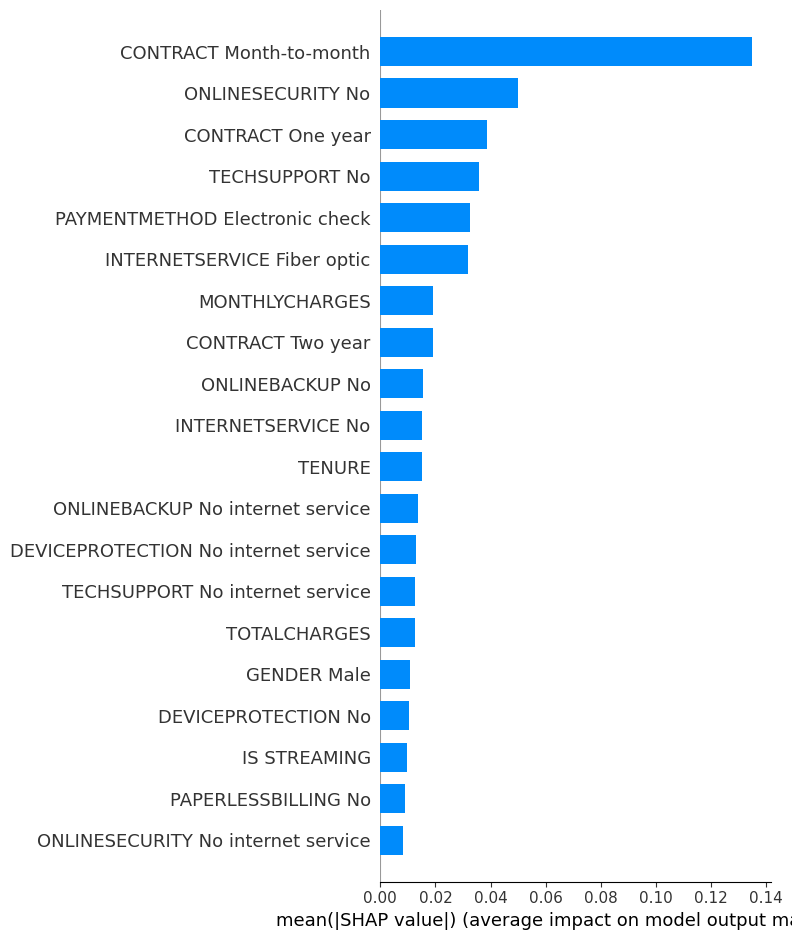

In [11]:
# Bar Plot (Mean SHAP value per feature)
import shap

shap.summary_plot(shap_values[1], data_df, plot_type="bar")